# MSEE UQ short course:  The $\texttt{UQpy}$ library

Application of Inference using the $\texttt{UQpy}$ module $\texttt{inference}$. 

Detailed instructions on how to use this module can be found in the $\texttt{UQpy}$ documentation.

https://uqpyproject.readthedocs.io/en/latest/inference/index.html

# Exercise 1 

This exercise aims to introduce the user to the Markov Chain Monte Carlo sampling methods available in $\texttt{UQpy}$, since they are a prerequisite for advanced Bayesian inference methods such as $\texttt{BayesianParameterEstimation}$

- Specifically, the $\texttt{MetropolisHastings}$ algorithms will be discussed.
- Ways to sample the target function, as well as several diagnostic will be provided.

In [2]:
from UQpy.distributions import DistributionND


class Rosenbrock(DistributionND):
    def __init__(self, p=20.):
        super().__init__(p=p)

    def pdf(self, x):
        return np.exp(-(100 * (x[:, 1] - x[:, 0] ** 2) ** 2 + (1 - x[:, 0]) ** 2) / self.parameters['p'])

    def log_pdf(self, x):
        return -(100 * (x[:, 1] - x[:, 0] ** 2) ** 2 + (1 - x[:, 0]) ** 2) / self.parameters['p']

### Step 1

Import the necessary libraries:

1. From the $\texttt{UQpy.sampling}$ module.
- $\texttt{MetroplisHastings}$

2. From the $\texttt{UQpy.distributions}$ module.
- $\texttt{Normal}$
- $\texttt{JointIndependent}$

### Step 1.1

The $\texttt{log}\_\texttt{target}$ function that we want to sample using the $\texttt{MetropolisHastings}$ samping method is defined below.

### Step 2

Create an instance of the $\texttt{MetropolisHastings}$ class:

- The funtion $\texttt{log}\_\texttt{target}$ provided serves as the $\texttt{log}\_\texttt{pdf}\_\texttt{target}$
- Since our proposal distribution is two dimensional, the value of the $\texttt{dimension}$ parameter is set to $2$.
- We generate four chain for the needs of the $\texttt{MetropolisHastings}$ method and as a result the parameter $\texttt{n}\_\texttt{chains}$ is set to $4$.
- Finally the $\texttt{burn}\_\texttt{length}$ and $\texttt{jump}$ parameters are set to $500$, $50$ respectively.

To initiate the sample generation using the $\texttt{MetropolisHastings}$ algorithm, the $\texttt{nsamples}$ parameter must be provided, either in the initializer, or after the initialization in the $\texttt{run}$ function of the class.
- The number of samples  is chosen here to be $500$. ($\texttt{nsamples}=500$)

### Step 2.1

The samples generated with the aid of the $\texttt{MetropolisHastings}$ class, can be retrieved using the $\texttt{samples}$ attribute.

- After retrieving the samples from the $\texttt{MetropolisHastings}$ algorithm, create a scatter plot of the generated samples.

(250, 4, 2)


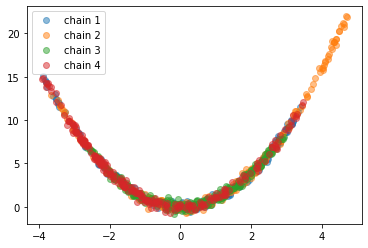

### Step 3

The acceptance rate of the chains can be accessed using the $\texttt{acceptance}\_\texttt{rate}$ attribute of the $\texttt{MCMC}$ algorithm.

If this metric is too low, then the provided input parameters make the sampling inefficient, as new samples to advance the chain are rarely choosen.

[0.15318518518518504, 0.12948148148148073, 0.13022222222222185, 0.17822222222222217]


### Step 3.1

Using the $\texttt{MCMC}$ generated samples, the following graphic diagnostic can be generated.

- The evolution of the sampled values.
- The convergence of the parameter towards its final value
- The correlation of between the samples generated for the respective parameter.

Note that the samples retrieved from any of the sampling algorithms in $\texttt{UQpy}$ are a 2 dimensional $\texttt{numpy}$ array. The number of rows represents the number of samples, while the columns represent the number of parameters.

To create each one of the plots, for each column $\texttt{j}$ of the samples 

- Parameter Convergence: $\texttt{plot(range(nsamples), np.cumsum(samples[:, j]/range(nsamples))}$
- Samples Correlation: $\texttt{acorr(samples[:, j]-np.mean(acorr(samples[:, j]))}$

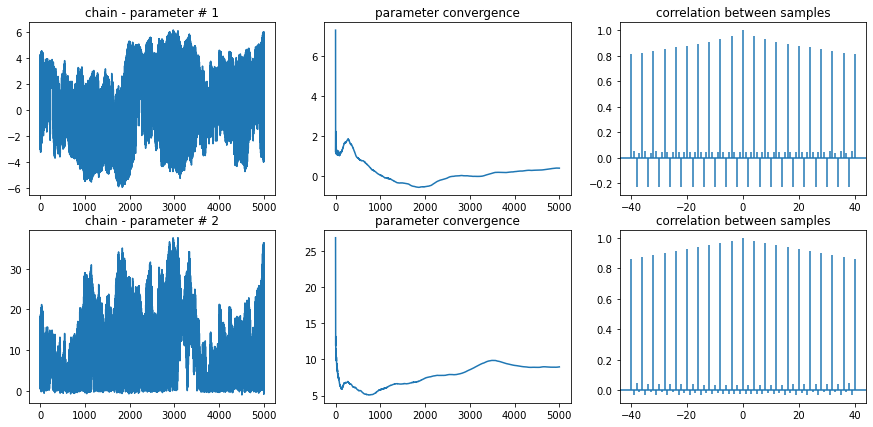

# Exercise 2 

Use **information-theoretic** inference to select between regression models. Consider the simple model:

$$y=m(\theta) + \epsilon$$

where $m(\cdot)$ is our numerical model that runs with $\texttt{RunModel}$ and $\epsilon$ is  noise. We have 50 synthetic measurements of $y$ using one of the following model:
    
1. $m_0(\theta)=\theta_{0} x$ (linear)
2. $m_1(\boldsymbol{\theta})=\theta_{0} x + \theta_{1} x^{2}$ (quadratic)
3. $m_2(\boldsymbol{\theta})=\theta_{0} x + \theta_{1} x^{2} + \theta_{2} x^{3}$ (cubic)

where $\theta_i$, $i=0,1, 2$ are the parameters of the model. We have also added some Gaussian noise ($\sim \mathcal{N}(0, 1)$) in the measurements which is considered to be homogeneous. You are given the file $\texttt{'data_ex1a.txt'}$ which contains the data. Select a statistical model from the set of three candidate models, given the data, using the $AIC_c$ information-theoretic criterion. You are provided with the file $\texttt{pfn.py}$ that contains the three models, written in $\texttt{Python}$.

### Step 1:

Read the data from the file.

### Step 2:

Import the necessary libraries:

1. From the $\texttt{UQpy.Inference}$ module.
- $\texttt{ComputationalModel}$
- $\texttt{InformationModelSelection}$

2. From $\texttt{UQpy.run}\_\texttt{model.RunModel}$ module import $\texttt{RunModel}$.

### Step 3:

Create instances of the $\texttt{RunModel}$ class for the three models.

### Step 4:

Create instances of the $\texttt{InferenceModel}$ class for the three models.

### Step 5

Perform model selection. Create an instance of $\texttt{InfoModelSelection}$ class, employs information-theoretic criteria for model selection, using the $AIC_c$ criterion. 


For each model print its  probability to generate the measurements.

# Exercise 3 


Learning the parameters of the quadratic model. Consider we have identified the quadratic model

$$m_2(\boldsymbol{\theta})=\theta_{0} x + \theta_{1} x^{2}$$

as the model that represents the data. Using the measurements, we want to learn the parameters $\theta_{0}$ and $\theta_{1}$ of the quadratic model.

In [ ]:
# Solution
data_ex1a = np.loadtxt('data_ex1a.txt')

### Step 1:

Import the necessary libraries.

1. From the $\texttt{UQpy.inference}$ module import:
- $\texttt{BayesParameterEstimation}$

2. From the $\texttt{UQpy.distributions}$ module import:
- $\texttt{Normal}$
- $\texttt{JoinIndependent}$ 

3. From $\texttt{UQpy.run}\_\texttt{RunModel}$ module import $\texttt{RunModel}$.

### Step 2:

Create instances of the $\texttt{RunModel}$ class for the quadratic model.

### Step 3:

Create a joint distribution object for its parameters $\boldsymbol{\theta}$ that represents our prior belief. Each marginal distribution is Normally distributed but, we don't provide any information about its parameters.

### Step 4:

Create an instance of the $\texttt{ComputationalModel}$ class. 

### Step 5:

Create a joint proposal distribution object for its parameters $\boldsymbol{\theta}$. Each marginal distribution is normally distributed, i.e., $\theta_0 \sim \mathcal{N}(0.0, 0.1)$ and  $\theta_1 \sim \mathcal{N}(0.0, 0.05)$.

### Step 6:

Create an instance of the $\texttt{BayesParameterEstimation}$ class.  Select as sampling algorithm the $\texttt{MetropolisHastings}$ algorithm of the $\texttt{MCMC}$ class.

Print the posterior values of the two parameters that are stored in the $\texttt{samples}$ attribute of the $\texttt{BayesParameterEstimation}$ object.

In [ ]:
from sklearn.neighbors import KernelDensity  # for the plots
import matplotlib.pyplot as plt

def pdf_from_kde(domain, samples1d):
    bandwidth = 1.06 * np.std(samples1d) * samples1d.size ** (-1 / 5)
    kde = KernelDensity(bandwidth=bandwidth).fit(samples1d.reshape((-1, 1)))
    log_dens = kde.score_samples(domain)
    return np.exp(log_dens)

# Exercise 4 

Use  **Bayesian model** selection to choose between regression models. Consider the problem of Exercise 1. In this case, each candidate model $m_i$ is given a prior probability $P(m_i) = 1/3$. For each model, our prior belief about its parameters $\theta_i$ is that they are normally distributed as: 
- $m_0(\theta)$: $\theta_0\sim\mathcal{N}(0,10)$.
- $m_1(\boldsymbol{\theta})$: $\theta_0\sim\mathcal{N}(0,1)$, $\theta_1\sim\mathcal{N}(0,1)$
- $m_2(\boldsymbol{\theta})$:  $\theta_0\sim\mathcal{N}(0,1)$, $\theta_1\sim\mathcal{N}(0,2)$, $\theta_2\sim\mathcal{N}(0,0.25)$

### Step 1:

Import the necessary libraries

1. From the $\texttt{UQpy.inference}$ module import:
- $\texttt{BayesModelSelection}$ 

2. From the $\texttt{UQpy.distributions}$ module import:
- $\texttt{Normal}$
- $\texttt{JoinIndependent}$ 

3. From the file $\texttt{data}\_\texttt{ex3.pkl}$ import the data to learn from

### Step 2:

Create instances of the $\texttt{RunModel}$ class for the three models.

### Step 3

For each model $m_i(\boldsymbol{\theta})$ create a joint distribution object for its parameters $\boldsymbol{\theta}$ that represents our prior belief.
- $m_0(\theta)$: $\theta_0\sim\mathcal{N}(0,10)$.
- $m_1(\boldsymbol{\theta})$: $\theta_0\sim\mathcal{N}(0,1)$, $\theta_1\sim\mathcal{N}(0,1)$
- $m_2(\boldsymbol{\theta})$:  $\theta_0\sim\mathcal{N}(0,1)$, $\theta_1\sim\mathcal{N}(0,2)$, $\theta_2\sim\mathcal{N}(0,0.25)$

### Step 4

Create instances of the $\texttt{InferenceModel}$ class for the three models. In this case, for each model model you should also provide the $\texttt{error}$\_$\texttt{covariance}$ as $\texttt{np.ones(50)}$ (Why?).

### Step 5

Create an instance of the $\texttt{BayesModelSelection}$ class. To this end, you will need to utilize $\texttt{MCMC}$ sampling methods:

1. Import the necessary libraries. From the $\texttt{UQpy.sampling}$ module import $\texttt{MetropolisHastings}$ class. 
2. For each model, create a joint proposal distribution for its parameters $\boldsymbol{\theta}$, where  each marginal distribution is normally distributed. 
2. For each model, select to sample 2000 realizations of the parameters from their joint distribution.

Print the posterior probability of each model.